In [2]:
import pandas as pd

file_path = 'Dianpingdata unclean.csv'
data = pd.read_csv(file_path, encoding='gbk')

# Display the first few rows of the dataset to understand its structure
data.head()

,城市代码,店名,分店,评价数,价格,地址
0,1,恩宠堂·宠物火化殡葬善终服务机构,有,244,￥936,上海大学
1,1,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),有,348,"￥1,007",新江湾城
2,1,思慕宠物·宠物火化宠物殡葬中心(闵行店),有,181,"￥1,040",浦江镇
3,1,四个拥抱·长宁宠物火化殡葬服务机构,无,117,"￥1,273",北新泾/淞虹路
4,1,向云端·宠物殡葬火化善终服务,无,169,"￥1,174",长风公园/华师大


In [3]:
keywords = ["宠物", "猫", "狗", "宠"]
filtered_data = data[data['店名'].str.contains('|'.join(keywords), na=False)]
data=filtered_data


In [4]:
data

,城市代码,店名,分店,评价数,价格,地址
0,1,恩宠堂·宠物火化殡葬善终服务机构,有,244,￥936,上海大学
1,1,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),有,348,"￥1,007",新江湾城
2,1,思慕宠物·宠物火化宠物殡葬中心(闵行店),有,181,"￥1,040",浦江镇
3,1,四个拥抱·长宁宠物火化殡葬服务机构,无,117,"￥1,273",北新泾/淞虹路
4,1,向云端·宠物殡葬火化善终服务,无,169,"￥1,174",长风公园/华师大
...,...,...,...,...,...,...
1868,92,First 最初宠物生活馆,无,12,￥71,万达广场
1869,101,抱抱宠屋(汇源路店),无,3,￥44,汤家桥
1870,101,喵汪宠物医院OBN(三江分院),无,54,￥77,永嘉县
1871,101,萌它琦宠物会馆Kowill猫舍,无,126,￥91,瑞安市区


In [6]:
# Define the mapping of city codes to English city names
city_code_mapping = {
    1: "Shanghai",
    2: "Beijing",
    7: "Shenzhen",
    4: "Guangzhou",
    9: "Chongqing",
    6: "Suzhou",
    8: "Chengdu",
    16: "Wuhan",
    5: "Nanjing",
    10: "Tianjin",
    11:"NingBo",
    21:"QingDao",
    13:"Wuxi",
    344:"ChangSha",
    160:"ZhengZhou",
    208:"FoShan",
    14:"Fuzhou",
    22:"JiNan",
    110:"HeFei",
    129:"Quanzhou",
    17:"XiAn",
    94:"Nantong",
    219:"Dongguan",
    148:"Yantai",
    93:"Changzhou",
    25:"Tangshan",
    92:"Xuzhou",
    19:"DaLian",
    101:"Wenzhou"
}

# Replace city codes with English city names in the dataset
data['城市代码'] = data['城市代码'].map(city_code_mapping)

data

,城市代码,店名,分店,评价数,价格,地址
0,Shanghai,恩宠堂·宠物火化殡葬善终服务机构,有,244,￥936,上海大学
1,Shanghai,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),有,348,"￥1,007",新江湾城
2,Shanghai,思慕宠物·宠物火化宠物殡葬中心(闵行店),有,181,"￥1,040",浦江镇
3,Shanghai,四个拥抱·长宁宠物火化殡葬服务机构,无,117,"￥1,273",北新泾/淞虹路
4,Shanghai,向云端·宠物殡葬火化善终服务,无,169,"￥1,174",长风公园/华师大
...,...,...,...,...,...,...
1868,Xuzhou,First 最初宠物生活馆,无,12,￥71,万达广场
1869,Wenzhou,抱抱宠屋(汇源路店),无,3,￥44,汤家桥
1870,Wenzhou,喵汪宠物医院OBN(三江分院),无,54,￥77,永嘉县
1871,Wenzhou,萌它琦宠物会馆Kowill猫舍,无,126,￥91,瑞安市区


In [7]:
# Check the number of missing values in the '评价数' column
missing_count = data['评价数'].isnull().sum()

# Check the number of entries with "无" in the '评价数' column
wu_count = (data['评价数'] == "无").sum()

missing_count, wu_count


(0, 105)

In [8]:
# Replace "无" in the '评价数' column with 0
data['评价数'] = data['评价数'].replace("无", 0)

# Convert the column to numeric type to ensure proper handling
data['评价数'] = pd.to_numeric(data['评价数'])
data


,城市代码,店名,分店,评价数,价格,地址
0,Shanghai,恩宠堂·宠物火化殡葬善终服务机构,有,244,￥936,上海大学
1,Shanghai,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),有,348,"￥1,007",新江湾城
2,Shanghai,思慕宠物·宠物火化宠物殡葬中心(闵行店),有,181,"￥1,040",浦江镇
3,Shanghai,四个拥抱·长宁宠物火化殡葬服务机构,无,117,"￥1,273",北新泾/淞虹路
4,Shanghai,向云端·宠物殡葬火化善终服务,无,169,"￥1,174",长风公园/华师大
...,...,...,...,...,...,...
1868,Xuzhou,First 最初宠物生活馆,无,12,￥71,万达广场
1869,Wenzhou,抱抱宠屋(汇源路店),无,3,￥44,汤家桥
1870,Wenzhou,喵汪宠物医院OBN(三江分院),无,54,￥77,永嘉县
1871,Wenzhou,萌它琦宠物会馆Kowill猫舍,无,126,￥91,瑞安市区


In [9]:
import numpy as np

# Extract numeric values from the '价格' column and replace non-numeric entries with NaN
data['价格'] = data['价格'].str.extract('(\d+)')  # Extract numeric parts
data['价格'] = pd.to_numeric(data['价格'], errors='coerce')  # Convert to numeric and replace invalid entries with NaN

data

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\张筠\AppData\Local\Temp\ipykernel_4252\328516213.py:4: SyntaxWarning: invalid escape sequence '\d'
  data['价格'] = data['价格'].str.extract('(\d+)')  # Extract numeric parts


,城市代码,店名,分店,评价数,价格,地址
0,Shanghai,恩宠堂·宠物火化殡葬善终服务机构,有,244,936.0,上海大学
1,Shanghai,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),有,348,1.0,新江湾城
2,Shanghai,思慕宠物·宠物火化宠物殡葬中心(闵行店),有,181,1.0,浦江镇
3,Shanghai,四个拥抱·长宁宠物火化殡葬服务机构,无,117,1.0,北新泾/淞虹路
4,Shanghai,向云端·宠物殡葬火化善终服务,无,169,1.0,长风公园/华师大
...,...,...,...,...,...,...
1868,Xuzhou,First 最初宠物生活馆,无,12,71.0,万达广场
1869,Wenzhou,抱抱宠屋(汇源路店),无,3,44.0,汤家桥
1870,Wenzhou,喵汪宠物医院OBN(三江分院),无,54,77.0,永嘉县
1871,Wenzhou,萌它琦宠物会馆Kowill猫舍,无,126,91.0,瑞安市区


In [10]:
# Check the number of missing values (NaN) in the '价格' column
missing_price_count = data['价格'].isnull().sum()

missing_price_count


216

In [11]:
# Fill missing values in the '价格' column with the mean price of the corresponding city
data['价格'] = data.groupby('城市代码')['价格'].transform(lambda x: x.fillna(x.mean()))
data


,城市代码,店名,分店,评价数,价格,地址
0,Shanghai,恩宠堂·宠物火化殡葬善终服务机构,有,244,936.0,上海大学
1,Shanghai,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),有,348,1.0,新江湾城
2,Shanghai,思慕宠物·宠物火化宠物殡葬中心(闵行店),有,181,1.0,浦江镇
3,Shanghai,四个拥抱·长宁宠物火化殡葬服务机构,无,117,1.0,北新泾/淞虹路
4,Shanghai,向云端·宠物殡葬火化善终服务,无,169,1.0,长风公园/华师大
...,...,...,...,...,...,...
1868,Xuzhou,First 最初宠物生活馆,无,12,71.0,万达广场
1869,Wenzhou,抱抱宠屋(汇源路店),无,3,44.0,汤家桥
1870,Wenzhou,喵汪宠物医院OBN(三江分院),无,54,77.0,永嘉县
1871,Wenzhou,萌它琦宠物会馆Kowill猫舍,无,126,91.0,瑞安市区


In [22]:
# 计算 "Yes" 的总和
total_yes_count = (data['殡葬'] == 'Yes').sum()

# 计算总记录数
total_records = data['殡葬'].count()

# 打印结果
print(f"Total 'Yes' Count: {total_yes_count}")
print(f"Total Records: {total_records}")


Total 'Yes' Count: 439
Total Records: 1509


In [23]:
# Create a new column '殡葬' with 'Yes' if '店名' contains '殡葬', otherwise 'No'
data['殡葬'] = data['店名'].apply(lambda x: 'Yes' if '殡葬' in x else 'No')

# Display the updated dataset to confirm the changes
data

,城市代码,店名,分店,评价数,价格,地址,殡葬
0,Shanghai,恩宠堂·宠物火化殡葬善终服务机构,Yes,244,936.0,上海大学,Yes
1,Shanghai,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),Yes,348,1.0,新江湾城,Yes
2,Shanghai,思慕宠物·宠物火化宠物殡葬中心(闵行店),Yes,181,1.0,浦江镇,Yes
3,Shanghai,四个拥抱·长宁宠物火化殡葬服务机构,No,117,1.0,北新泾/淞虹路,Yes
4,Shanghai,向云端·宠物殡葬火化善终服务,No,169,1.0,长风公园/华师大,Yes
...,...,...,...,...,...,...,...
1868,Xuzhou,First 最初宠物生活馆,No,12,71.0,万达广场,No
1869,Wenzhou,抱抱宠屋(汇源路店),No,3,44.0,汤家桥,No
1870,Wenzhou,喵汪宠物医院OBN(三江分院),No,54,77.0,永嘉县,No
1871,Wenzhou,萌它琦宠物会馆Kowill猫舍,No,126,91.0,瑞安市区,No


In [24]:
data

,城市代码,店名,分店,评价数,价格,地址,殡葬
0,Shanghai,恩宠堂·宠物火化殡葬善终服务机构,Yes,244,936.0,上海大学,Yes
1,Shanghai,彩虹爪印·高端宠物火化宠物殡葬服务(杨浦店),Yes,348,1.0,新江湾城,Yes
2,Shanghai,思慕宠物·宠物火化宠物殡葬中心(闵行店),Yes,181,1.0,浦江镇,Yes
3,Shanghai,四个拥抱·长宁宠物火化殡葬服务机构,No,117,1.0,北新泾/淞虹路,Yes
4,Shanghai,向云端·宠物殡葬火化善终服务,No,169,1.0,长风公园/华师大,Yes
...,...,...,...,...,...,...,...
1868,Xuzhou,First 最初宠物生活馆,No,12,71.0,万达广场,No
1869,Wenzhou,抱抱宠屋(汇源路店),No,3,44.0,汤家桥,No
1870,Wenzhou,喵汪宠物医院OBN(三江分院),No,54,77.0,永嘉县,No
1871,Wenzhou,萌它琦宠物会馆Kowill猫舍,No,126,91.0,瑞安市区,No


In [ ]:
import chardet
import pandas as pd

# 先以二进制模式打开文件，检测其编码
with open('cleaned_data.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# 根据检测到的编码读取文件
data = pd.read_csv('cleaned_data.csv', encoding=encoding)

# 定义关键词列表
keywords = ['洗', '殡仪馆', '宠舍', '育', '宠物店', '购', '买', '咖', '基地', '狗舍', '猫舍', '殡仪']

# 构建筛选条件
filter_condition = ~data.apply(lambda x: any(x.astype(str).str.contains(keyword).any() for keyword in keywords), axis=1)

# 进行数据筛选
filtered_data = data[filter_condition]

# 将处理后的数据保存为新的CSV文件，使用UTF-8编码
filtered_data.to_csv('filtered_cleaned_data.csv', encoding='utf - 8', index=False)

In [ ]:
import pandas as pd
# 假设df是你从GBK编码文件读取后的数据（比如通过df = pd.read_csv('your_file.csv', encoding='gbk')得到）
df.to_csv('cleaned_data.csv', encoding='utf - 8', index=False)
# 将数据保存为CSV文件，文件名为Dianpingcleaned_data.csv
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size and styling
plt.rcParams['font.sans-serif'] = ['SimHei']  # Enable Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Correctly display minus signs

# Count the number of stores in each city
city_store_counts = data['城市代码'].value_counts()

# Create a bar chart with refined appearance
plt.figure(figsize=(12, 8))
# Use a soft pastel color for the bars with black borders
bars = city_store_counts.sort_values(ascending=False).plot(kind='bar', color='#B4E1D1', edgecolor='black')

# Set title and labels with elegant fonts and larger sizes
plt.title('Total Number of Stores by City', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('City', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Number of Stores', fontsize=16, fontweight='bold', color='#5A5A5A')

# Annotate the bars with their respective values above the bars
for p in bars.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha='center', va='bottom', 
             fontsize=14, color='black', fontweight='bold')

# Customize tick labels
plt.xticks(rotation=45, fontsize=14, color='#4A4A4A')
plt.yticks(fontsize=14, color='#4A4A4A')

# Remove gridlines for a cleaner look but keep the horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


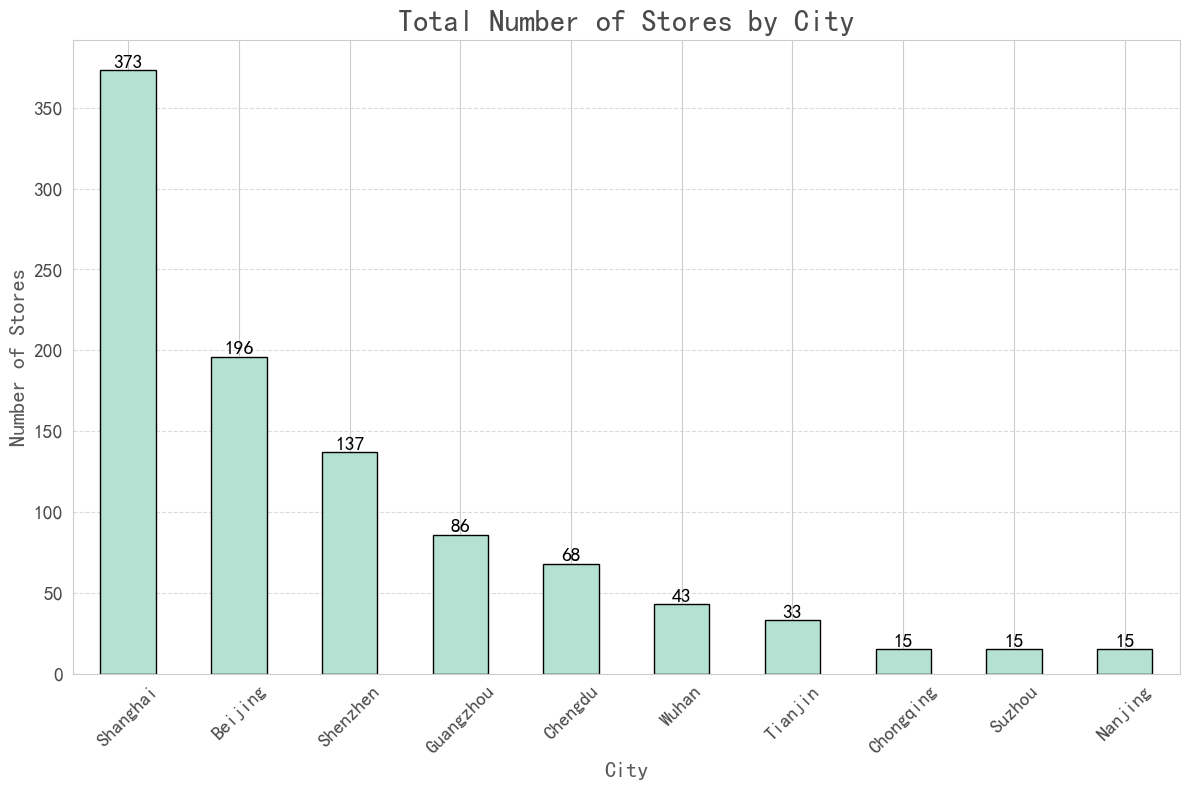

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size and styling
plt.rcParams['font.sans-serif'] = ['SimHei']  # Enable Chinese characters
plt.rcParams['axes.unicode_minus'] = False  # Correctly display minus signs

# Count the number of stores in each city
city_store_counts = data['城市代码'].value_counts()

# Create a bar chart with refined appearance
plt.figure(figsize=(12, 8))
# Use a soft pastel color for the bars with black borders
bars = city_store_counts.sort_values(ascending=False).plot(kind='bar', color='#B4E1D1', edgecolor='black')

# Set title and labels with elegant fonts and larger sizes
plt.title('Total Number of Stores by City', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('City', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Number of Stores', fontsize=16, fontweight='bold', color='#5A5A5A')

# Annotate the bars with their respective values above the bars
for p in bars.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha='center', va='bottom', 
             fontsize=14, color='black', fontweight='bold')

# Customize tick labels
plt.xticks(rotation=45, fontsize=14, color='#4A4A4A')
plt.yticks(fontsize=14, color='#4A4A4A')

# Remove gridlines for a cleaner look but keep the horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


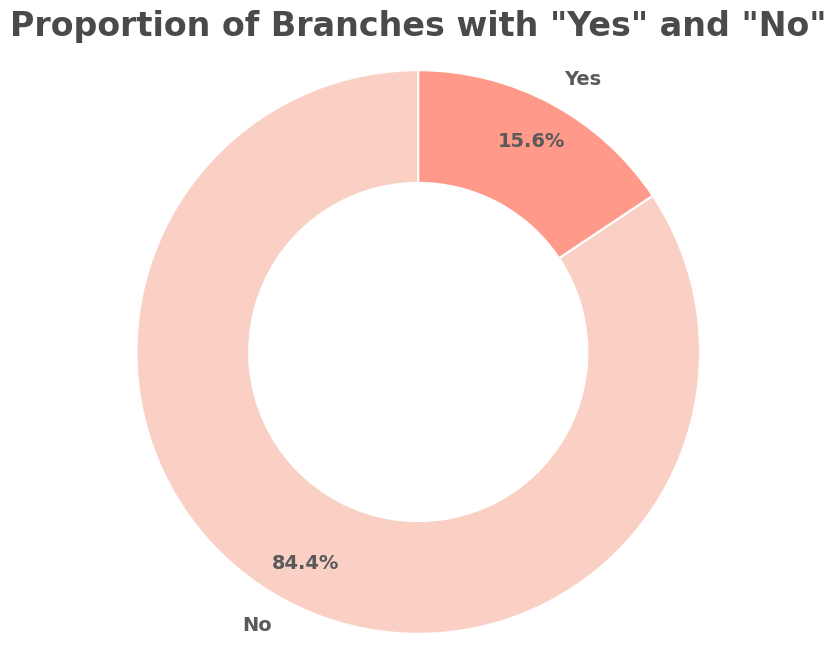

In [12]:
import matplotlib.pyplot as plt
data['分店'] = data['分店'].replace({'有': 'Yes', '无': 'No'})

branch_counts = data['分店'].value_counts()

plt.figure(figsize=(8, 8))

colors = ['#FAD0C4', '#FF9A8B']

plt.pie(branch_counts, labels=branch_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops=dict(width=0.4, edgecolor='white', linewidth=1.5), colors=colors, 
        pctdistance=0.85, textprops={'fontsize': 14, 'fontweight': 'bold', 'color': '#5A5A5A'})

plt.title('Proportion of Branches with "Yes" and "No"', fontsize=24, color='#4A4A4A', fontweight='bold')

plt.axis('equal')

plt.show()


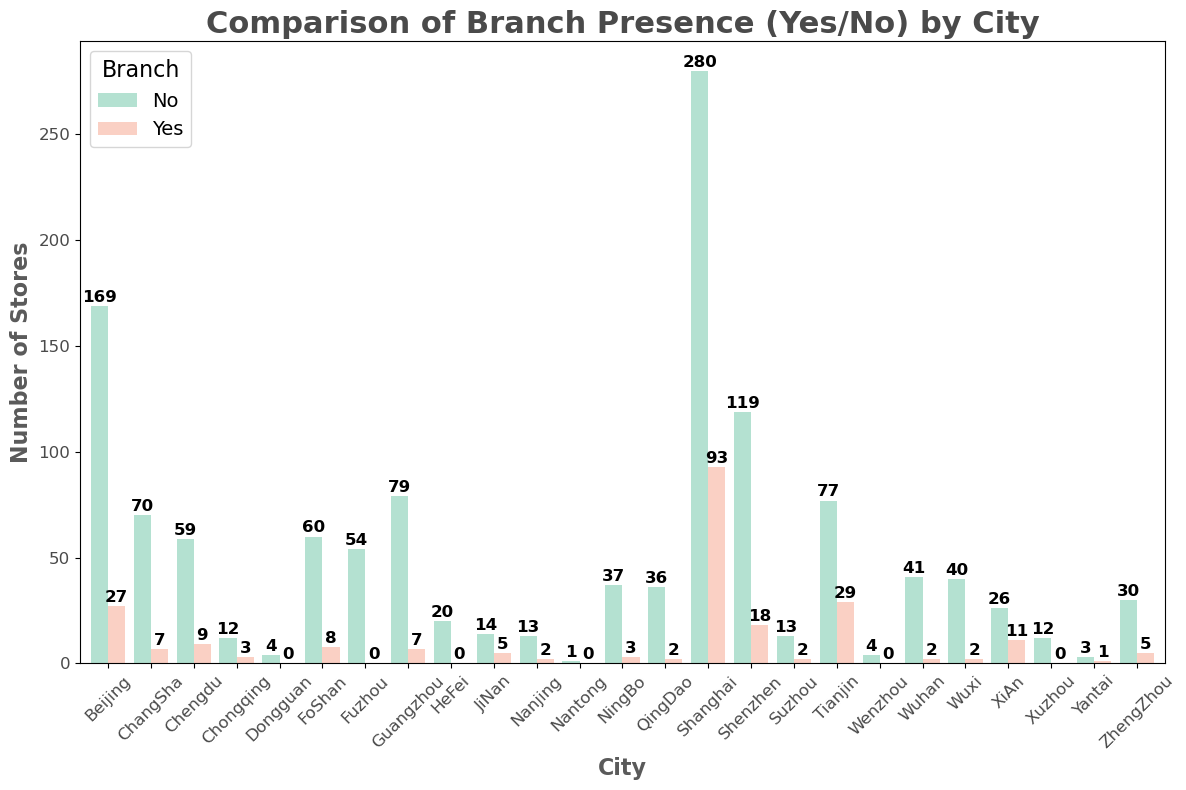

In [13]:
import matplotlib.pyplot as plt

branch_counts_by_city = data.groupby(['城市代码', '分店']).size().unstack(fill_value=0)

ax = branch_counts_by_city.plot(kind='bar', figsize=(12, 8), width=0.8, color=['#B4E1D1', '#FAD0C4'])

plt.title('Comparison of Branch Presence (Yes/No) by City', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('City', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Number of Stores', fontsize=16, fontweight='bold', color='#5A5A5A')

plt.xticks(rotation=45, fontsize=12, color='#4A4A4A')
plt.yticks(fontsize=12, color='#4A4A4A')

plt.legend(title='Branch', labels=['No', 'Yes'], fontsize=14, title_fontsize=16, loc='upper left')

# Annotating bars with their respective values above the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height + 0.5), ha='center', va='bottom', 
                fontsize=12, color='black', fontweight='bold')

# Remove gridlines
plt.grid(False)

plt.tight_layout()
plt.show()


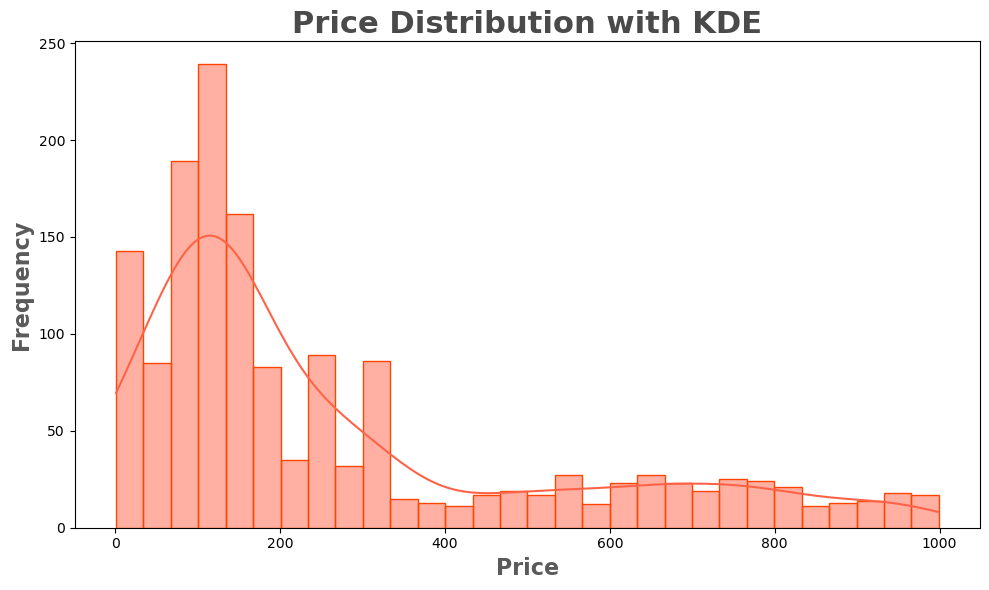

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['价格'], kde=True, bins=30, color='#FF6347', edgecolor='#FF4500')

plt.title('Price Distribution with KDE', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('Price', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='#5A5A5A')

plt.grid(False)
plt.tight_layout()
plt.show()


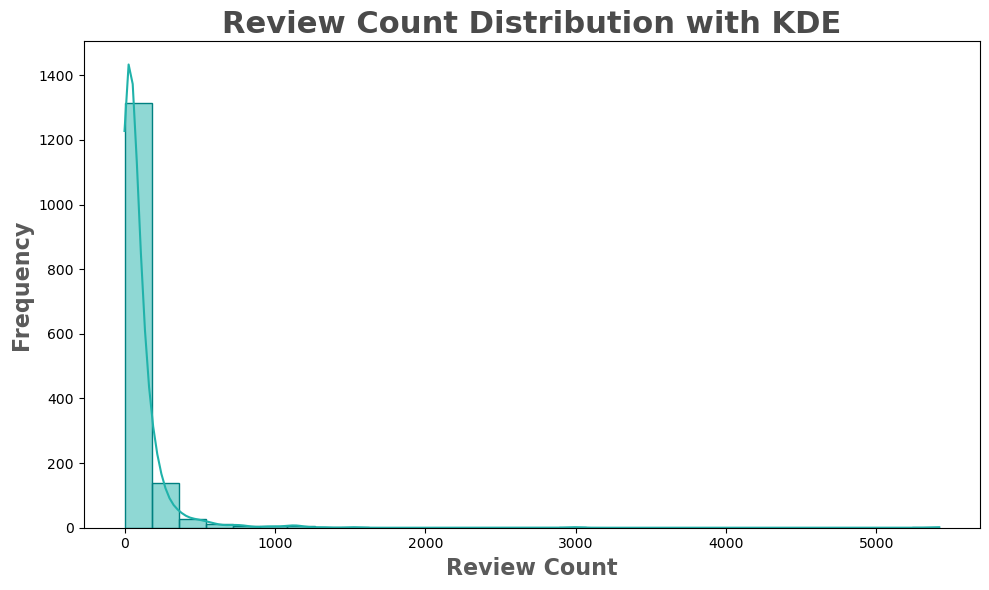

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['评价数'], kde=True, bins=30, color='#20B2AA', edgecolor='#008080')

plt.title('Review Count Distribution with KDE', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('Review Count', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Frequency', fontsize=16, fontweight='bold', color='#5A5A5A')

plt.grid(False)
plt.tight_layout()
plt.show()


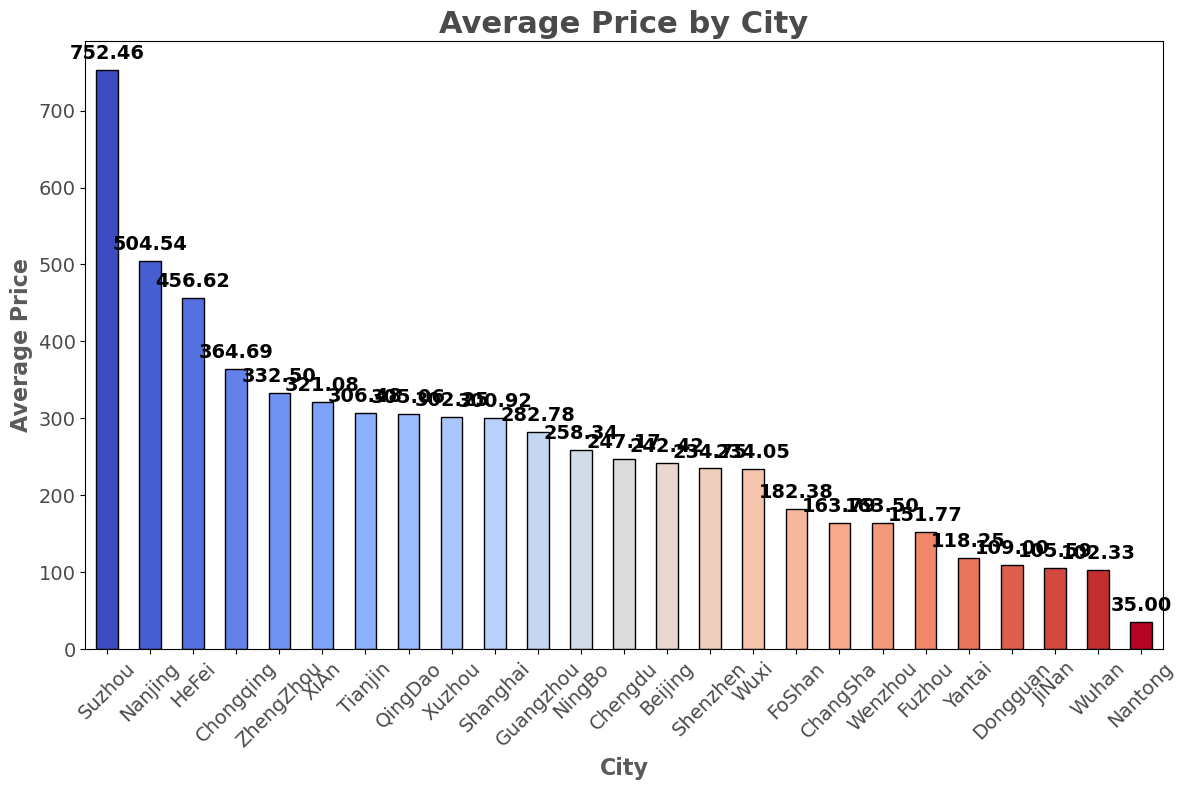

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average price for each city
average_price_by_city = data.groupby('城市代码')['价格'].mean()

# Create a bar chart for average prices by city
plt.figure(figsize=(12, 8))
# Use the coolwarm colormap to color the bars based on their height
colors = plt.cm.coolwarm(np.linspace(0, 1, len(average_price_by_city)))
average_price_by_city.sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')

# Set title and labels with elegant fonts and larger sizes
plt.title('Average Price by City', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('City', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Average Price', fontsize=16, fontweight='bold', color='#5A5A5A')

# Annotate the bars with their respective values above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', 
                       fontsize=14, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Customize ticks and axis labels
plt.xticks(rotation=45, fontsize=14, color='#4A4A4A')
plt.yticks(fontsize=14, color='#4A4A4A')

# Remove the gridlines
plt.grid(False)

# Tight layout to ensure everything fits nicely
plt.tight_layout()
plt.show()


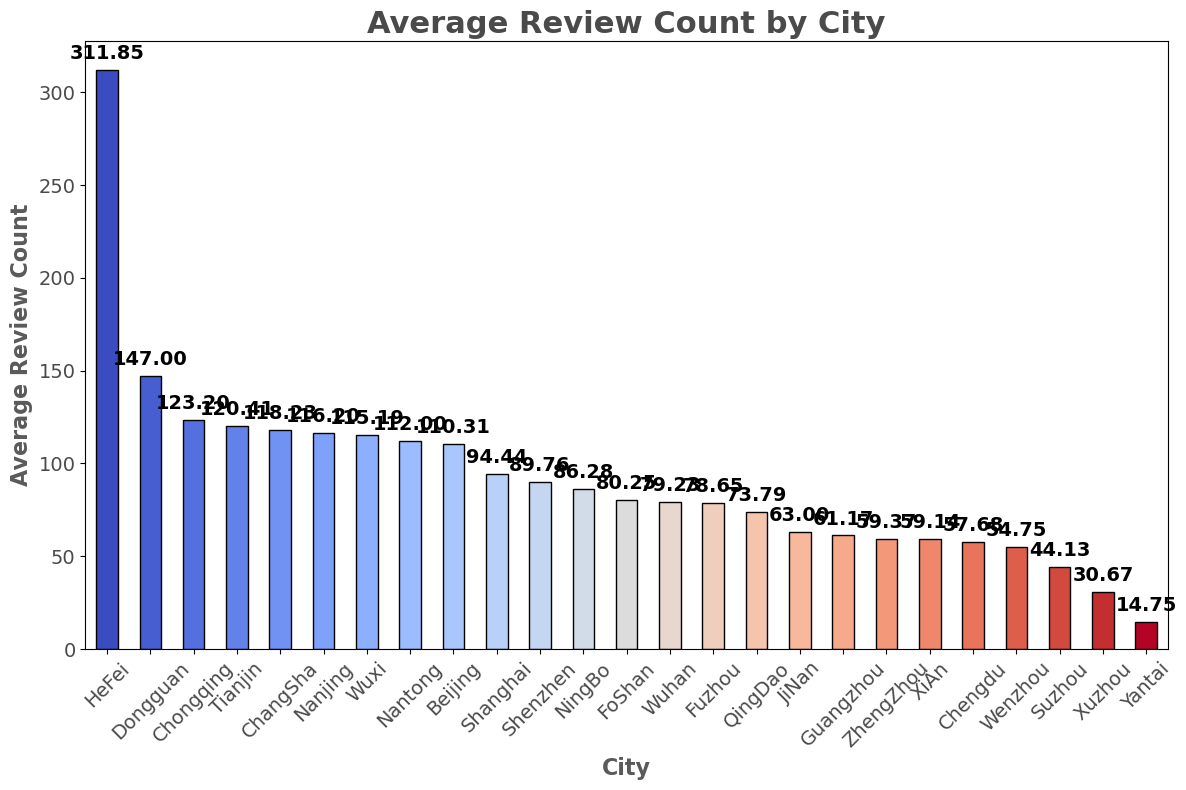

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the average review count for each city
average_reviews_by_city = data.groupby('城市代码')['评价数'].mean()

# Create a bar chart for average review counts by city
plt.figure(figsize=(12, 8))
# Use the coolwarm colormap to color the bars based on their height
colors = plt.cm.coolwarm(np.linspace(0, 1, len(average_reviews_by_city)))
average_reviews_by_city.sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')

# Set title and labels with elegant fonts and larger sizes
plt.title('Average Review Count by City', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('City', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Average Review Count', fontsize=16, fontweight='bold', color='#5A5A5A')

# Annotate the bars with their respective values above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', 
                       fontsize=14, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Customize ticks and axis labels
plt.xticks(rotation=45, fontsize=14, color='#4A4A4A')
plt.yticks(fontsize=14, color='#4A4A4A')

# Remove the gridlines for a cleaner look
plt.grid(False)

# Tight layout to ensure everything fits nicely
plt.tight_layout()
plt.show()


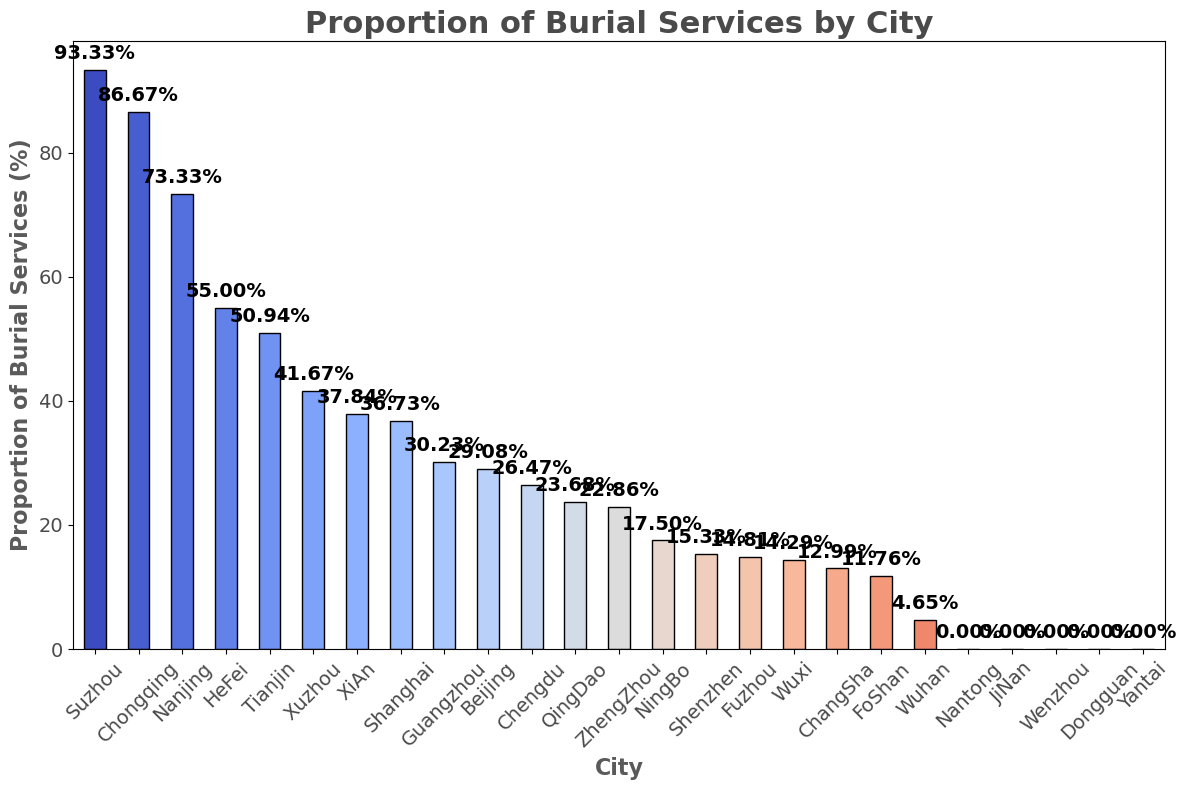

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the proportion of "Yes" in the '殡葬' column for each city
burial_ratio_by_city = data.groupby('城市代码')['殡葬'].apply(lambda x: (x == 'Yes').mean())

# Convert to percentage
burial_ratio_by_city *= 100

# Create a bar chart for burial service proportions by city
plt.figure(figsize=(12, 8))
# Use the coolwarm colormap to color the bars based on their height
colors = plt.cm.coolwarm(np.linspace(0, 1, len(burial_ratio_by_city)))
burial_ratio_by_city.sort_values(ascending=False).plot(kind='bar', color=colors, edgecolor='black')

# Set title and labels with elegant fonts and larger sizes
plt.title('Proportion of Burial Services by City', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('City', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Proportion of Burial Services (%)', fontsize=16, fontweight='bold', color='#5A5A5A')

# Annotate the bars with their respective values above the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', 
                       fontsize=14, color='black', fontweight='bold', xytext=(0, 5), textcoords='offset points')

# Customize ticks and axis labels
plt.xticks(rotation=45, fontsize=14, color='#4A4A4A')
plt.yticks(fontsize=14, color='#4A4A4A')

# Remove the gridlines for a cleaner look
plt.grid(False)

# Tight layout to ensure everything fits nicely
plt.tight_layout()
plt.show()


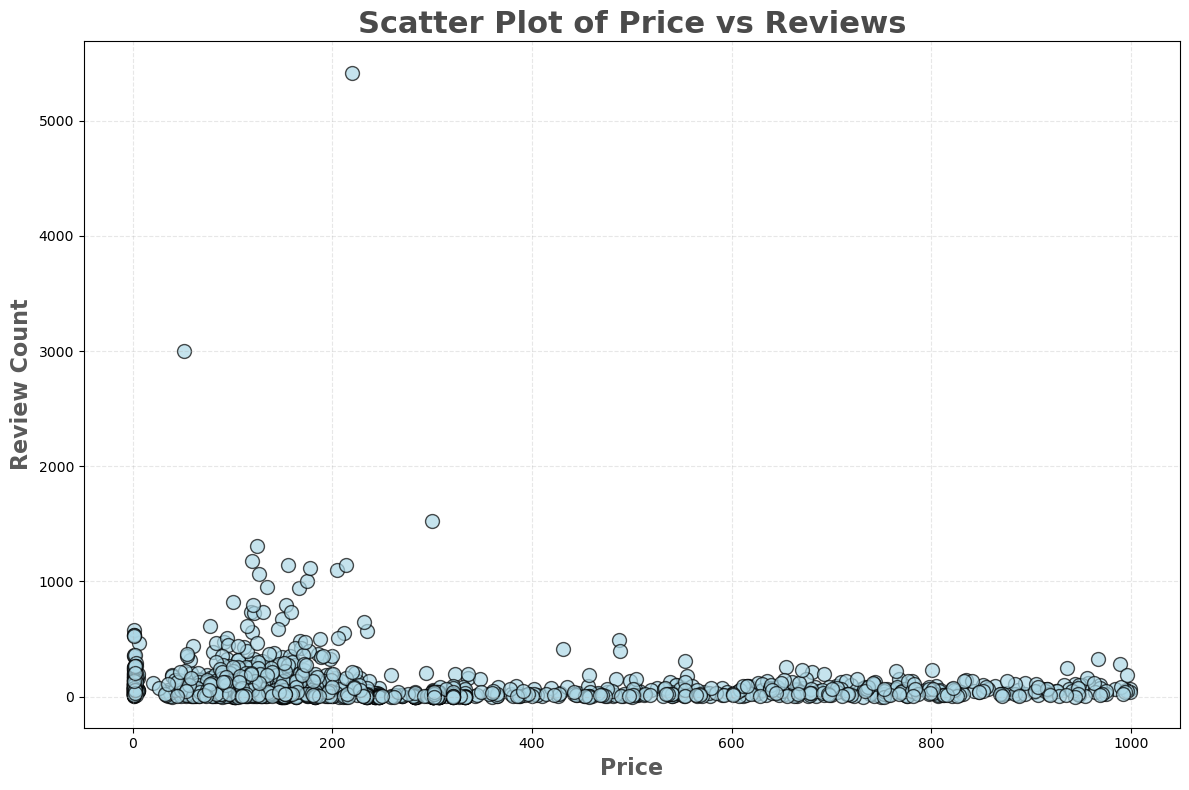

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot for Price vs Reviews
plt.figure(figsize=(12, 8))  # Adjusted figure size for better spacing
plt.scatter(data['价格'], data['评价数'], alpha=0.7, edgecolor='black', color='#ADD8E6', s=100)

# Set the title and labels with a clean font and light colors
plt.title('Scatter Plot of Price vs Reviews', fontsize=22, fontweight='bold', color='#4A4A4A')
plt.xlabel('Price', fontsize=16, fontweight='bold', color='#5A5A5A')
plt.ylabel('Review Count', fontsize=16, fontweight='bold', color='#5A5A5A')

# Remove the gridlines for a cleaner look
plt.grid(linestyle='--', alpha=0.3)

# Tight layout for better spacing and readability
plt.tight_layout()
plt.show()
